In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams["svg.fonttype"] = "none"

injected_current:  100



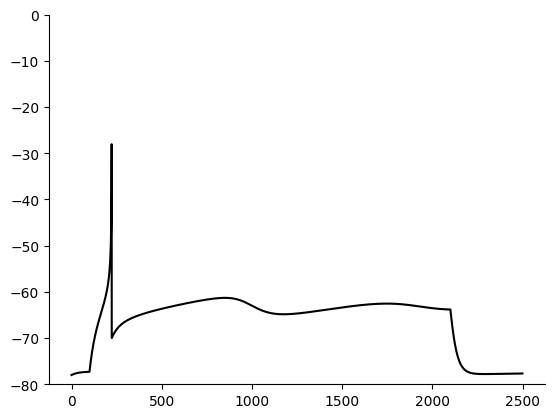



IO curve



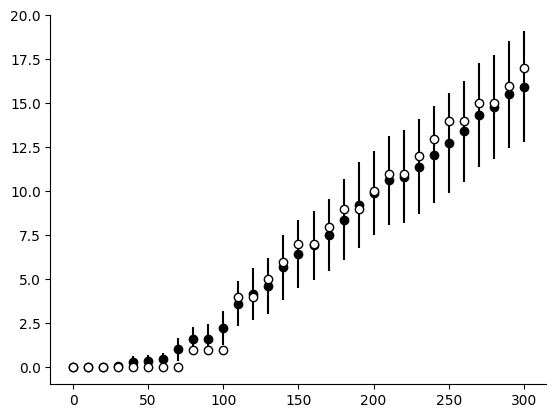

In [2]:
#Model of Male SHAM pyramidal neurons

#Experimental results
exp_mean_spike_count=[
0,
0,
0,
0.105263158,
0.315789474,
0.368421053,
0.473684211,
1.026315789,
1.596491228,
1.622807018,
2.245614035,
3.614035088,
4.166666667,
4.622807018,
5.692982456,
6.429824561,
6.929824561,
7.526315789,
8.394736842,
9.219298246,
9.912280702,
10.63157895,
10.84210526,
11.4122807,
12.0877193,
12.73684211,
13.40350877,
14.35087719,
14.81578947,
15.51754386,
15.93859649,
]

exp_sem_spike_count=[
0,
0,
0,
0.105263158,
0.315789474,
0.368421053,
0.369672062,
0.63576827,
0.728862389,
0.840016293,
0.96825577,
1.28500705,
1.467815871,
1.600430523,
1.856064256,
1.923120999,
1.943036909,
2.027197432,
2.318464549,
2.438890975,
2.394742197,
2.527418808,
2.647821867,
2.71024242,
2.754651345,
2.824643128,
2.868809996,
2.948934421,
2.958119374,
3.024453477,
3.144459181,
]






L_soma = 30 #µm
diam_soma = 30 #µm
area_soma = math.pi*diam_soma*L_soma #µm2

#values per area
cm = 10 #µF/cm-2
gL = 0.00030165106711688166 #S/cm-2
gNa = 0.003 #S/cm-2
slope_Na=5.7
v12mNa = -35
gAbar_soma = 0.01 #S/cm-2

#model values
C_soma = (cm*(area_soma*pow(10,-8)))*pow(10,6) #pF
gL_soma = (gL*(area_soma*pow(10,-8)))*pow(10,9) #nS
gNa_soma = (gNa*(area_soma*pow(10,-8)))*pow(10,9) #nS
gAbar_soma_abs = (gAbar_soma*(area_soma*pow(10,-8)))*pow(10,9) #nS

EA = -80.06901458987173
EL=-78
ENa=50
VA = -36.88564167869956
deltaA = 5.577140058389753
VR=-70
deltagA1_soma = 1.1
deltagA2_soma = 0.031
deltagA3_soma = 0.0
tauA = 506.6249626721206
VD=-20
tref=0



#Define duration of one injected step trial
time_tot=2500
dt=0.5
dot_nb=int(time_tot/dt)

#list of injected current steps
Is_step_list=[
0,
10,
20,
30,
40,
50,
60,
70,
80,
90,
100,
110,
120,
130,
140,
150,
160,
170,
180,
190,
200,
210,
220,
230,
240,
250,
260,
270,
280,
290,
300,
]






model_spike_count=[]

for Is_step in Is_step_list:

    #print()
    #print(Is_step)

    Is=0 #pA

    vm_soma=[0]*dot_nb
    vm_soma[0]=EL

    gA_soma=[0]*dot_nb
    gA_soma[0]=0




    spike_time=-10000000000
    spike_time_list=[]
    time_list=[0]*dot_nb

    time_simul=0

    for i in range(dot_nb-1): 

        time_simul=(i+1)*dt
        time_list[i+1]=time_simul

        vm_soma_prev=vm_soma[i]

        gA_soma_prev=gA_soma[i]



        if time_simul>=100 and time_simul<=2100:
            Is=Is_step
        else:
            Is=0



        if (time_simul-spike_time)<=tref:

            vm_soma[i+1]=vm_soma_prev

            gA_soma_next = gA_soma_prev + (1/tauA)*dt*( (gAbar_soma_abs/(1+np.exp((VA-vm_soma_prev)/deltaA))) - gA_soma_prev )
            gA_soma[i+1] = gA_soma_next

        else:

            minf = 1/(1+np.exp(-(vm_soma_prev-v12mNa)/slope_Na))
            gA_soma_next = gA_soma_prev + (1/tauA)*dt*( (gAbar_soma_abs/(1+np.exp((VA-vm_soma_prev)/deltaA))) - gA_soma_prev )
            vm_soma_next = vm_soma_prev + (1/C_soma)*dt*( gL_soma*(EL-vm_soma_prev) + gA_soma_next*(EA-vm_soma_prev) + gNa_soma*minf*(ENa-vm_soma_prev) + Is )

            spike_happening=False
            if vm_soma_next>=VD:
                spike_happening=True

            if spike_happening==True:
                vm_soma_next=VR
                gA_soma_next = gA_soma_next + deltagA1_soma + deltagA2_soma*gA_soma_next + deltagA3_soma*gA_soma_next*gA_soma_next
                spike_time=time_simul
                spike_time_list.append(spike_time)

            vm_soma[i+1]=vm_soma_next
            gA_soma[i+1]=gA_soma_next


    if Is_step==100:
        print('injected_current: ',Is_step)
        print()
        plt.plot(time_list,vm_soma,'k')
        plt.ylim(-80,0)
        plt.savefig('SHAM_Male_model_trace.svg')
        plt.show()

    model_spike_count.append(len(spike_time_list))

print()
print()
print('IO curve')
print()
plt.errorbar(Is_step_list,exp_mean_spike_count,yerr=exp_sem_spike_count,fmt='o',color='k')
plt.errorbar(Is_step_list,model_spike_count,yerr=[0]*len(model_spike_count),fmt='o',mfc='w',mec='k')
plt.savefig('IOcurve_network_model_male_SHAM.svg')
plt.show()

injected_current:  100



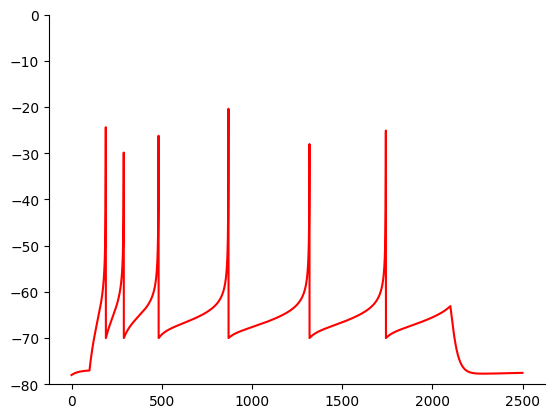

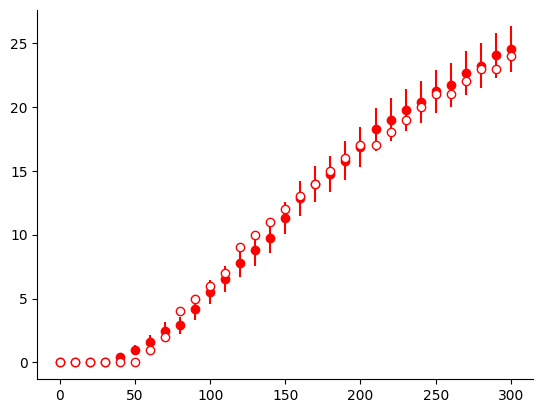

In [3]:
#Model of Male LNIO pyramidal neurons

#Experimental results
exp_mean_spike_count=[
0,
0,
0.00877193,
0.043859649,
0.421052632,
1.013157895,
1.635964912,
2.451754386,
2.921052632,
4.175438596,
5.543859649,
6.535087719,
7.793859649,
8.763157895,
9.754385965,
11.33333333,
12.85964912,
13.95045045,
14.75438596,
15.80263158,
16.85087719,
18.23245614,
19.00438596,
19.77192982,
20.37280702,
21.21929825,
21.72368421,
22.62280702,
23.22807018,
24.02192982,
24.50438596,
]

exp_sem_spike_count=[
0,
0,
0.00877193,
0.031230627,
0.167934585,
0.34870788,
0.483849125,
0.692394385,
0.674056273,
0.830791462,
0.932181184,
0.991830027,
1.084384802,
1.188155276,
1.211701692,
1.250367419,
1.367819864,
1.403984999,
1.415382885,
1.501854068,
1.5802988,
1.704647135,
1.677613256,
1.629789037,
1.67082736,
1.681055777,
1.696092492,
1.70842292,
1.756914371,
1.773999684,
1.78436352,
]




L_soma = 30 #µm
diam_soma = 30 #µm
area_soma = math.pi*diam_soma*L_soma #µm2

#values per area
cm = 10 #µF/cm-2
gL = 0.00030165106711688166 #S/cm-2

gNa = 0.004 #S/cm-2
slope_Na=5.7
v12mNa = -35

gAbar_soma = 0.01 #S/cm-2


#model values
C_soma = (cm*(area_soma*pow(10,-8)))*pow(10,6) #pF
gL_soma = (gL*(area_soma*pow(10,-8)))*pow(10,9) #nS
gNa_soma = (gNa*(area_soma*pow(10,-8)))*pow(10,9) #nS
gAbar_soma_abs = (gAbar_soma*(area_soma*pow(10,-8)))*pow(10,9) #nS


EA = -80.06901458987173
EL=-78
ENa=50
VA = -36.88564167869956
deltaA = 5.577140058389753
VR=-70
deltagA1_soma = 0.4
deltagA2_soma = 0.073
deltagA3_soma = 0.0
tauA = 506.6249626721206
VD=-20
tref=0


time_tot=2500
dt=0.5
dot_nb=int(time_tot/dt)



#Is_step_list=[0,70,100,200,300,400,490]

Is_step_list=[
0,
10,
20,
30,
40,
50,
60,
70,
80,
90,
100,
110,
120,
130,
140,
150,
160,
170,
180,
190,
200,
210,
220,
230,
240,
250,
260,
270,
280,
290,
300,
]






model_spike_count=[]

for Is_step in Is_step_list:

    #print()
    #print(Is_step)

    Is=0 #pA

    vm_soma=[0]*dot_nb
    vm_soma[0]=EL

    gA_soma=[0]*dot_nb
    gA_soma[0]=0




    spike_time=-10000000000
    spike_time_list=[]
    time_list=[0]*dot_nb

    time_simul=0

    for i in range(dot_nb-1): 

        time_simul=(i+1)*dt
        time_list[i+1]=time_simul

        vm_soma_prev=vm_soma[i]

        gA_soma_prev=gA_soma[i]



        if time_simul>=100 and time_simul<=2100:
            Is=Is_step
        else:
            Is=0



        if (time_simul-spike_time)<=tref:

            vm_soma[i+1]=vm_soma_prev

            gA_soma_next = gA_soma_prev + (1/tauA)*dt*( (gAbar_soma_abs/(1+np.exp((VA-vm_soma_prev)/deltaA))) - gA_soma_prev )
            gA_soma[i+1] = gA_soma_next

        else:

            minf = 1/(1+np.exp(-(vm_soma_prev-v12mNa)/slope_Na))
            gA_soma_next = gA_soma_prev + (1/tauA)*dt*( (gAbar_soma_abs/(1+np.exp((VA-vm_soma_prev)/deltaA))) - gA_soma_prev )
            vm_soma_next = vm_soma_prev + (1/C_soma)*dt*( gL_soma*(EL-vm_soma_prev) + gA_soma_next*(EA-vm_soma_prev) + gNa_soma*minf*(ENa-vm_soma_prev) + Is )

            spike_happening=False
            if vm_soma_next>=VD:
                spike_happening=True

            if spike_happening==True:
                vm_soma_next=VR
                gA_soma_next = gA_soma_next + deltagA1_soma + deltagA2_soma*gA_soma_next + deltagA3_soma*gA_soma_next*gA_soma_next
                spike_time=time_simul
                spike_time_list.append(spike_time)

            vm_soma[i+1]=vm_soma_next
            gA_soma[i+1]=gA_soma_next



    if Is_step==100:
        print('injected_current: ',Is_step)
        print()
        plt.plot(time_list,vm_soma,'r')
        plt.ylim(-80,0)
        plt.savefig('LNIO_Male_model_trace.svg')
        plt.show()

    model_spike_count.append(len(spike_time_list))

plt.errorbar(Is_step_list,exp_mean_spike_count,yerr=exp_sem_spike_count,fmt='o',color='r')
plt.errorbar(Is_step_list,model_spike_count,yerr=[0]*len(model_spike_count),fmt='o',mfc='w',mec='r')
plt.savefig('IOcurve_network_model_male_LNIO.svg')
plt.show()

injected_current:  100



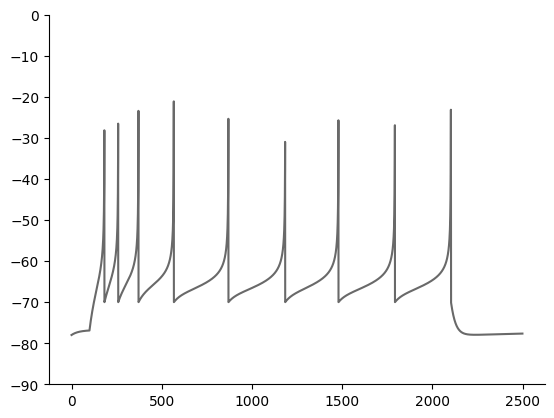

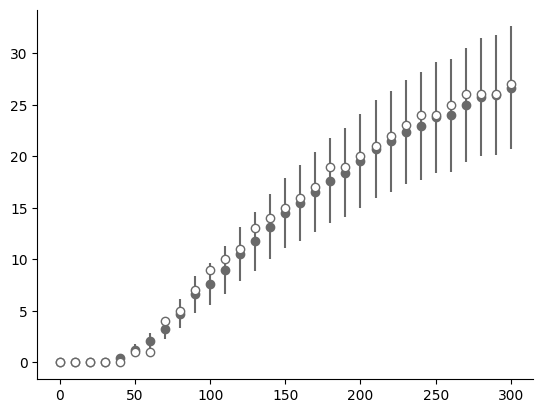

In [4]:
#Model of Female SHAM pyramidal neurons

#Experimental results
exp_mean_spike_count=[
0,
0,
0,
0,
0.4375,
1.1875,
2.0625,
3.28125,
4.75,
6.59375,
7.625,
8.96875,
10.5,
11.75,
13.1875,
14.5,
15.46875,
16.53125,
17.625,
18.40625,
19.53125,
20.6875,
21.4375,
22.3125,
22.9375,
23.78125,
23.96875,
24.96875,
25.75,
25.9375,
26.625,
]

exp_sem_spike_count=[
0,
0,
0,
0,
0.3125,
0.617243536,
0.815060069,
1.025679399,
1.391192534,
1.789563931,
2.062815632,
2.31411824,
2.593662147,
2.83615056,
3.144066833,
3.390243354,
3.67465099,
3.862336499,
4.107031572,
4.316204629,
4.557610108,
4.739874075,
4.890653288,
5.049520398,
5.224715901,
5.38573903,
5.491938932,
5.55061347,
5.72185139,
5.856242218,
5.96508941,
]






L_soma = 30 #µm
diam_soma = 30 #µm
area_soma = math.pi*diam_soma*L_soma #µm2

#values per area
cm = 10 #µF/cm-2
gL = 0.00030165106711688166 #S/cm-2

gNa = 0.0044 #S/cm-2
slope_Na=5.7
v12mNa = -35

gAbar_soma = 0.01 #S/cm-2


#model values
C_soma = (cm*(area_soma*pow(10,-8)))*pow(10,6) #pF
gL_soma = (gL*(area_soma*pow(10,-8)))*pow(10,9) #nS
gNa_soma = (gNa*(area_soma*pow(10,-8)))*pow(10,9) #nS
gAbar_soma_abs = (gAbar_soma*(area_soma*pow(10,-8)))*pow(10,9) #nS


EA = -80.06901458987173
EL=-78
ENa=50
VA = -36.88564167869956
deltaA = 5.577140058389753
VR=-70
VD=-20
tref=0
deltagA1_soma = 0.3
deltagA2_soma = 0.003
deltagA3_soma = 0.006
tauA = 506.6249626721206




time_tot=2500
dt=0.5
dot_nb=int(time_tot/dt)




Is_step_list=[
0,
10,
20,
30,
40,
50,
60,
70,
80,
90,
100,
110,
120,
130,
140,
150,
160,
170,
180,
190,
200,
210,
220,
230,
240,
250,
260,
270,
280,
290,
300,
]






model_spike_count=[]

for Is_step in Is_step_list:

    Is=0 #pA

    vm_soma=[0]*dot_nb
    vm_soma[0]=EL
    
    gA_soma=[0]*dot_nb
    gA_soma[0]=0




    spike_time=-10000000000
    spike_time_list=[]
    time_list=[0]*dot_nb

    time_simul=0

    for i in range(dot_nb-1): 

        time_simul=(i+1)*dt
        time_list[i+1]=time_simul

        vm_soma_prev=vm_soma[i]
        gA_soma_prev=gA_soma[i]



        if time_simul>=100 and time_simul<=2100:
            Is=Is_step
        else:
            Is=0



        if (time_simul-spike_time)<=tref:

            vm_soma[i+1]=vm_soma_prev
            
            gA_soma_next = gA_soma_prev + (1/tauA)*dt*( (gAbar_soma_abs/(1+np.exp((VA-vm_soma_prev)/deltaA))) - gA_soma_prev )
            gA_soma[i+1] = gA_soma_next

        else:

            minf = 1/(1+np.exp(-(vm_soma_prev-v12mNa)/slope_Na))
            gA_soma_next = gA_soma_prev + (1/tauA)*dt*( (gAbar_soma_abs/(1+np.exp((VA-vm_soma_prev)/deltaA))) - gA_soma_prev )
            vm_soma_next = vm_soma_prev + (1/C_soma)*dt*( gL_soma*(EL-vm_soma_prev) + gA_soma_next*(EA-vm_soma_prev) + gNa_soma*minf*(ENa-vm_soma_prev) + Is )

            spike_happening=False
            if vm_soma_next>=VD:
                spike_happening=True

            if spike_happening==True:
                vm_soma_next=VR
                gA_soma_next = gA_soma_next + deltagA1_soma + deltagA2_soma*gA_soma_next + deltagA3_soma*gA_soma_next*gA_soma_next
                spike_time=time_simul
                spike_time_list.append(spike_time)

            vm_soma[i+1]=vm_soma_next
            gA_soma[i+1]=gA_soma_next



    if Is_step==100:
        print('injected_current: ',Is_step)
        print()
        plt.plot(time_list,vm_soma,'dimgrey')
        plt.ylim(-90,0)
        plt.savefig('SHAM_Female_model_trace.svg')
        plt.show()

    model_spike_count.append(len(spike_time_list))

plt.errorbar(Is_step_list,exp_mean_spike_count,yerr=exp_sem_spike_count,fmt='o',color='dimgrey')
plt.errorbar(Is_step_list,model_spike_count,yerr=[0]*len(model_spike_count),fmt='o',mfc='w',mec='dimgrey')
plt.savefig('IOcurve_network_model_female_SHAM.svg')
plt.show()

injected_current:  100



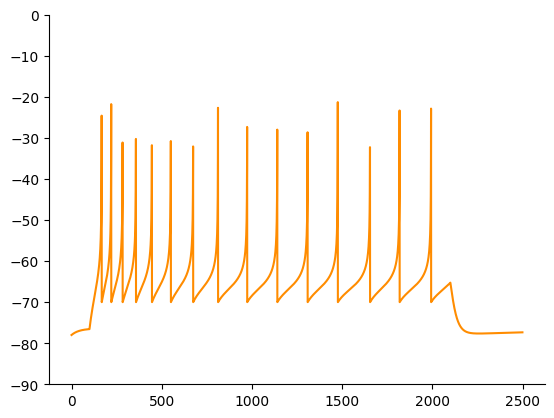

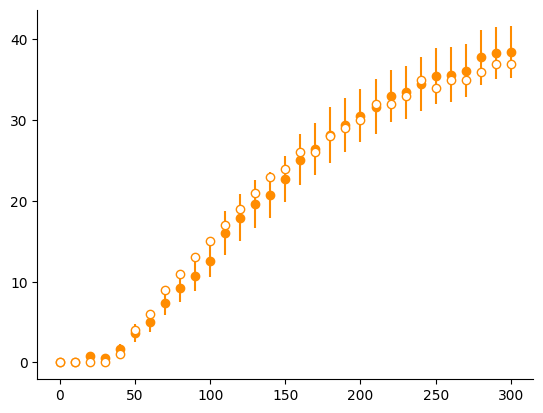

In [5]:
#Model of Female LNIO pyramidal neurons

#Experimental results
exp_mean_spike_count=[
0,
0.108695652,
0.804347826,
0.565217391,
1.608695652,
3.608695652,
5.043478261,
7.413043478,
9.260869565,
10.7173913,
12.54347826,
16.02173913,
17.91304348,
19.58695652,
20.7173913,
22.73913043,
25.08695652,
26.47826087,
28.17391304,
29.41304348,
30.56521739,
31.67391304,
33,
33.45652174,
34.5,
35.5,
35.63043478,
36.13043478,
37.76086957,
38.26086957,
38.43478261,
]

exp_sem_spike_count=[
0,
0.108695652,
0.489755858,
0.333125616,
0.650293732,
1.112699119,
1.283797265,
1.564064134,
1.790364407,
1.840966108,
2.002940783,
2.761515283,
2.89620376,
2.953468547,
2.853440141,
2.817202514,
3.170493312,
3.208880689,
3.452044232,
3.382945511,
3.332719626,
3.37094196,
3.216650112,
3.271313972,
3.36571883,
3.443071751,
3.445398115,
3.316806138,
3.350103173,
3.217090842,
3.159042537,
]






L_soma = 30 #µm
diam_soma = 30 #µm
area_soma = math.pi*diam_soma*L_soma #µm2

#values per area
cm = 10 #µF/cm-2
gL = 0.00030165106711688166 #S/cm-2

gNa = 0.0055 #S/cm-2
slope_Na=5.7
v12mNa = -35

gAbar_soma = 0.01 #S/cm-2


#model values
C_soma = (cm*(area_soma*pow(10,-8)))*pow(10,6) #pF
gL_soma = (gL*(area_soma*pow(10,-8)))*pow(10,9) #nS
gNa_soma = (gNa*(area_soma*pow(10,-8)))*pow(10,9) #nS
gAbar_soma_abs = (gAbar_soma*(area_soma*pow(10,-8)))*pow(10,9) #nS

EA = -80.06901458987173
EL=-78
ENa=50
VA = -36.88564167869956
deltaA = 5.577140058389753
VR=-70
VD=-20
tref=0
deltagA1_soma = 0.07
deltagA2_soma = 0.001
deltagA3_soma = 0.0052
tauA = 506.6249626721206





time_tot=2500
dt=0.5
dot_nb=int(time_tot/dt)




Is_step_list=[
0,
10,
20,
30,
40,
50,
60,
70,
80,
90,
100,
110,
120,
130,
140,
150,
160,
170,
180,
190,
200,
210,
220,
230,
240,
250,
260,
270,
280,
290,
300,
]






model_spike_count=[]

for Is_step in Is_step_list:
    
    Is=0 #pA

    vm_soma=[0]*dot_nb
    vm_soma[0]=EL
    
    gA_soma=[0]*dot_nb
    gA_soma[0]=0




    spike_time=-10000000000
    spike_time_list=[]
    time_list=[0]*dot_nb

    time_simul=0

    for i in range(dot_nb-1): 

        time_simul=(i+1)*dt
        time_list[i+1]=time_simul

        vm_soma_prev=vm_soma[i]
        gA_soma_prev=gA_soma[i]



        if time_simul>=100 and time_simul<=2100:
            Is=Is_step
        else:
            Is=0



        if (time_simul-spike_time)<=tref:

            vm_soma[i+1]=vm_soma_prev
            
            gA_soma_next = gA_soma_prev + (1/tauA)*dt*( (gAbar_soma_abs/(1+np.exp((VA-vm_soma_prev)/deltaA))) - gA_soma_prev )
            gA_soma[i+1] = gA_soma_next

        else:

            minf = 1/(1+np.exp(-(vm_soma_prev-v12mNa)/slope_Na))
            gA_soma_next = gA_soma_prev + (1/tauA)*dt*( (gAbar_soma_abs/(1+np.exp((VA-vm_soma_prev)/deltaA))) - gA_soma_prev )
            vm_soma_next = vm_soma_prev + (1/C_soma)*dt*( gL_soma*(EL-vm_soma_prev) + gA_soma_next*(EA-vm_soma_prev) + gNa_soma*minf*(ENa-vm_soma_prev) + Is )

            spike_happening=False
            if vm_soma_next>=VD:
                spike_happening=True

            if spike_happening==True:
                vm_soma_next=VR
                gA_soma_next = gA_soma_next + deltagA1_soma + deltagA2_soma*gA_soma_next + deltagA3_soma*gA_soma_next*gA_soma_next
                spike_time=time_simul
                spike_time_list.append(spike_time)

            vm_soma[i+1]=vm_soma_next
            gA_soma[i+1]=gA_soma_next



    if Is_step==100:
        print('injected_current: ',Is_step)
        print()
        plt.plot(time_list,vm_soma,'darkorange')
        plt.ylim(-90,0)
        plt.savefig('LNIO_Female_model_trace.svg')
        plt.show()

    model_spike_count.append(len(spike_time_list))

plt.errorbar(Is_step_list,exp_mean_spike_count,yerr=exp_sem_spike_count,fmt='o',color='darkorange')
plt.errorbar(Is_step_list,model_spike_count,yerr=[0]*len(model_spike_count),fmt='o',mfc='w',mec='darkorange')
plt.savefig('IOcurve_network_model_female_LNIO.svg')
plt.show()

injected_current:  100



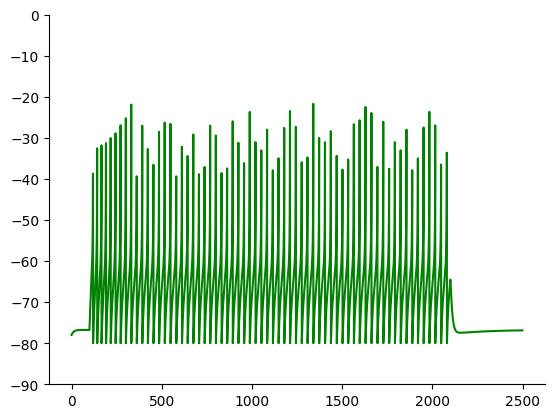

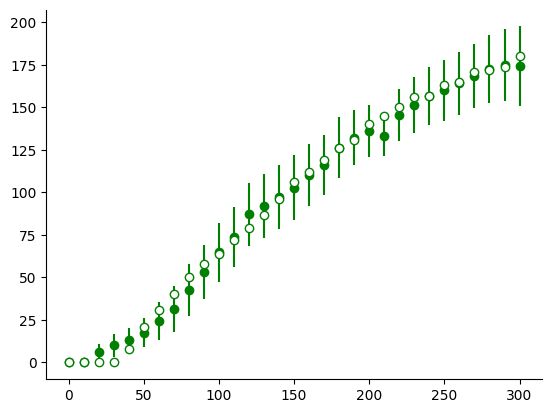

In [6]:
#Model of Fast-spiker interneurons

#Experimental results
exp_mean_spike_count=[
0,
0.333333333,
6.222222222,
10,
13,
17.61111111,
24.27777778,
31.38888889,
42.55555556,
52.94444444,
64.77777778,
73.88888889,
87.27777778,
92.05555556,
97.38888889,
102.8333333,
110.3888889,
116.2777778,
126.2222222,
132.1666667,
135.9285714,
132.9285714,
145.5,
151.5,
156.5714286,
160.0714286,
164.0714286,
168.2857143,
172.3571429,
175,
174.3571429,
]

exp_sem_spike_count=[
0,
0.333333333,
4.575835618,
6.666666667,
7.061240055,
8.435942357,
11.07647379,
13.73402551,
15.23073566,
15.86979233,
17.530749,
17.60657583,
18.54931698,
18.85478948,
18.94322251,
19.01899635,
18.31206679,
17.53154124,
17.88604187,
16.03165272,
15.35315563,
11.59968625,
15.2834333,
16.58420074,
17.1864525,
17.89933112,
18.7262321,
18.86381556,
19.96506302,
21.05661303,
23.23910761,
]





L_soma = 15 #µm
diam_soma = 15 #µm
area_soma = math.pi*diam_soma*L_soma #µm2

#values per area
cm = 10 #µF/cm-2
gL = 0.001#S/cm-2

gNa = 0.015 #S/cm-2
slope_Na=5.7
v12mNa = -35

gAbar_soma = 0.01 #S/cm-2


#model values
C_soma = (cm*(area_soma*pow(10,-8)))*pow(10,6) #pF
gL_soma = (gL*(area_soma*pow(10,-8)))*pow(10,9) #nS
gNa_soma = (gNa*(area_soma*pow(10,-8)))*pow(10,9) #nS
gAbar_soma_abs = (gAbar_soma*(area_soma*pow(10,-8)))*pow(10,9) #nS


EA = -80.06901458987173
EL=-78
ENa=50
VA = -36.88564167869956
deltaA = 5.577140058389753
VR=-80
VD=-20
tref=0
deltagA1_soma = 0.05
deltagA2_soma = 0.014
deltagA3_soma = 0.004
tauA = 150




time_tot=2500
dt=0.5
dot_nb=int(time_tot/dt)



Is_step_list=[
0,
10,
20,
30,
40,
50,
60,
70,
80,
90,
100,
110,
120,
130,
140,
150,
160,
170,
180,
190,
200,
210,
220,
230,
240,
250,
260,
270,
280,
290,
300,
]






model_spike_count=[]

for Is_step in Is_step_list:

    Is=0 #pA

    vm_soma=[0]*dot_nb
    vm_soma[0]=EL
    
    gA_soma=[0]*dot_nb
    gA_soma[0]=0




    spike_time=-10000000000
    spike_time_list=[]
    time_list=[0]*dot_nb

    time_simul=0

    for i in range(dot_nb-1): 

        time_simul=(i+1)*dt
        time_list[i+1]=time_simul

        vm_soma_prev=vm_soma[i]
        gA_soma_prev=gA_soma[i]



        if time_simul>=100 and time_simul<=2100:
            Is=Is_step
        else:
            Is=0



        if (time_simul-spike_time)<=tref:

            vm_soma[i+1]=vm_soma_prev
            
            gA_soma_next = gA_soma_prev + (1/tauA)*dt*( (gAbar_soma_abs/(1+np.exp((VA-vm_soma_prev)/deltaA))) - gA_soma_prev )
            gA_soma[i+1] = gA_soma_next

        else:

            minf = 1/(1+np.exp(-(vm_soma_prev-v12mNa)/slope_Na))
            gA_soma_next = gA_soma_prev + (1/tauA)*dt*( (gAbar_soma_abs/(1+np.exp((VA-vm_soma_prev)/deltaA))) - gA_soma_prev )
            vm_soma_next = vm_soma_prev + (1/C_soma)*dt*( gL_soma*(EL-vm_soma_prev) + gA_soma_next*(EA-vm_soma_prev) + gNa_soma*minf*(ENa-vm_soma_prev) + Is )

            spike_happening=False
            if vm_soma_next>=VD:
                spike_happening=True

            if spike_happening==True:
                vm_soma_next=VR
                gA_soma_next = gA_soma_next + deltagA1_soma + deltagA2_soma*gA_soma_next + deltagA3_soma*gA_soma_next*gA_soma_next
                spike_time=time_simul
                spike_time_list.append(spike_time)

            vm_soma[i+1]=vm_soma_next
            gA_soma[i+1]=gA_soma_next



    if Is_step==100:
        print('injected_current: ',Is_step)
        print()
        plt.plot(time_list,vm_soma,'g')
        plt.ylim(-90,0)
        plt.savefig('FS_model_trace.svg')
        plt.show()

    model_spike_count.append(len(spike_time_list))

plt.errorbar(Is_step_list,exp_mean_spike_count,yerr=exp_sem_spike_count,fmt='o',color='g')
plt.errorbar(Is_step_list,model_spike_count,yerr=[0]*len(model_spike_count),fmt='o',mfc='w',mec='g')
plt.savefig('IOcurve_network_model_FSinterneuron.svg')
plt.show()